# PPOL 564: Data Science 1 - Foundations
## Factors Associated with Variation in Medicaid Application Processing Time Across States
### Caroline Adams
### Final Project Presentation

# Problem Statement

Individuals with low incomes and/or disabilities face multiple barriers to obtaining Medicaid coverage. 

Eligibility criteria and determination processes vary widely by state program, leading to inequities in the ability and time it takes to enroll in Medicaid. 

Delays in coverage provision can force eligible individuals to forgo or postpone neeeded care or lead to unnecessary financial burden.

# Background
Medicaid is a safety-net health insurance program. 
- Jointly financed by states and the federal government
- Provides coverage for individuals with low incomes or disabilities

Medicaid eligibility and application processes vary by state.

State-level factors including wealth, infrastructure (technology and personnel), and political leaning are thought to influence eligibility processes

51 state (and D.C.) Medicaid programs, each with unique eligibility criteria and determination processes

The application process usually requires that an individual provide proof of identity and eligiblity through an application that asks about financial status, assets, and health conditions

States may accept paper applications via the mail, complete applications via phone, or allow applications to be completed through online portals

Some states have the ability to process applications automatically using online portals

Individuals eligible for Medicaid coverage may face substantial delays to receiving coverage for necessary health care services due to state determination processes

State-level factors including wealth, infrastructure (technology and personnel), and political leaning are thought to influence eligibility processes

# Methods Considered
- Data wrangling and joining
- Data visualization
- Machine learning

# Methods Used To Date
- Data wrangling and joining
- Data visualization

# Preliminary Results


Reviewed data nationally 


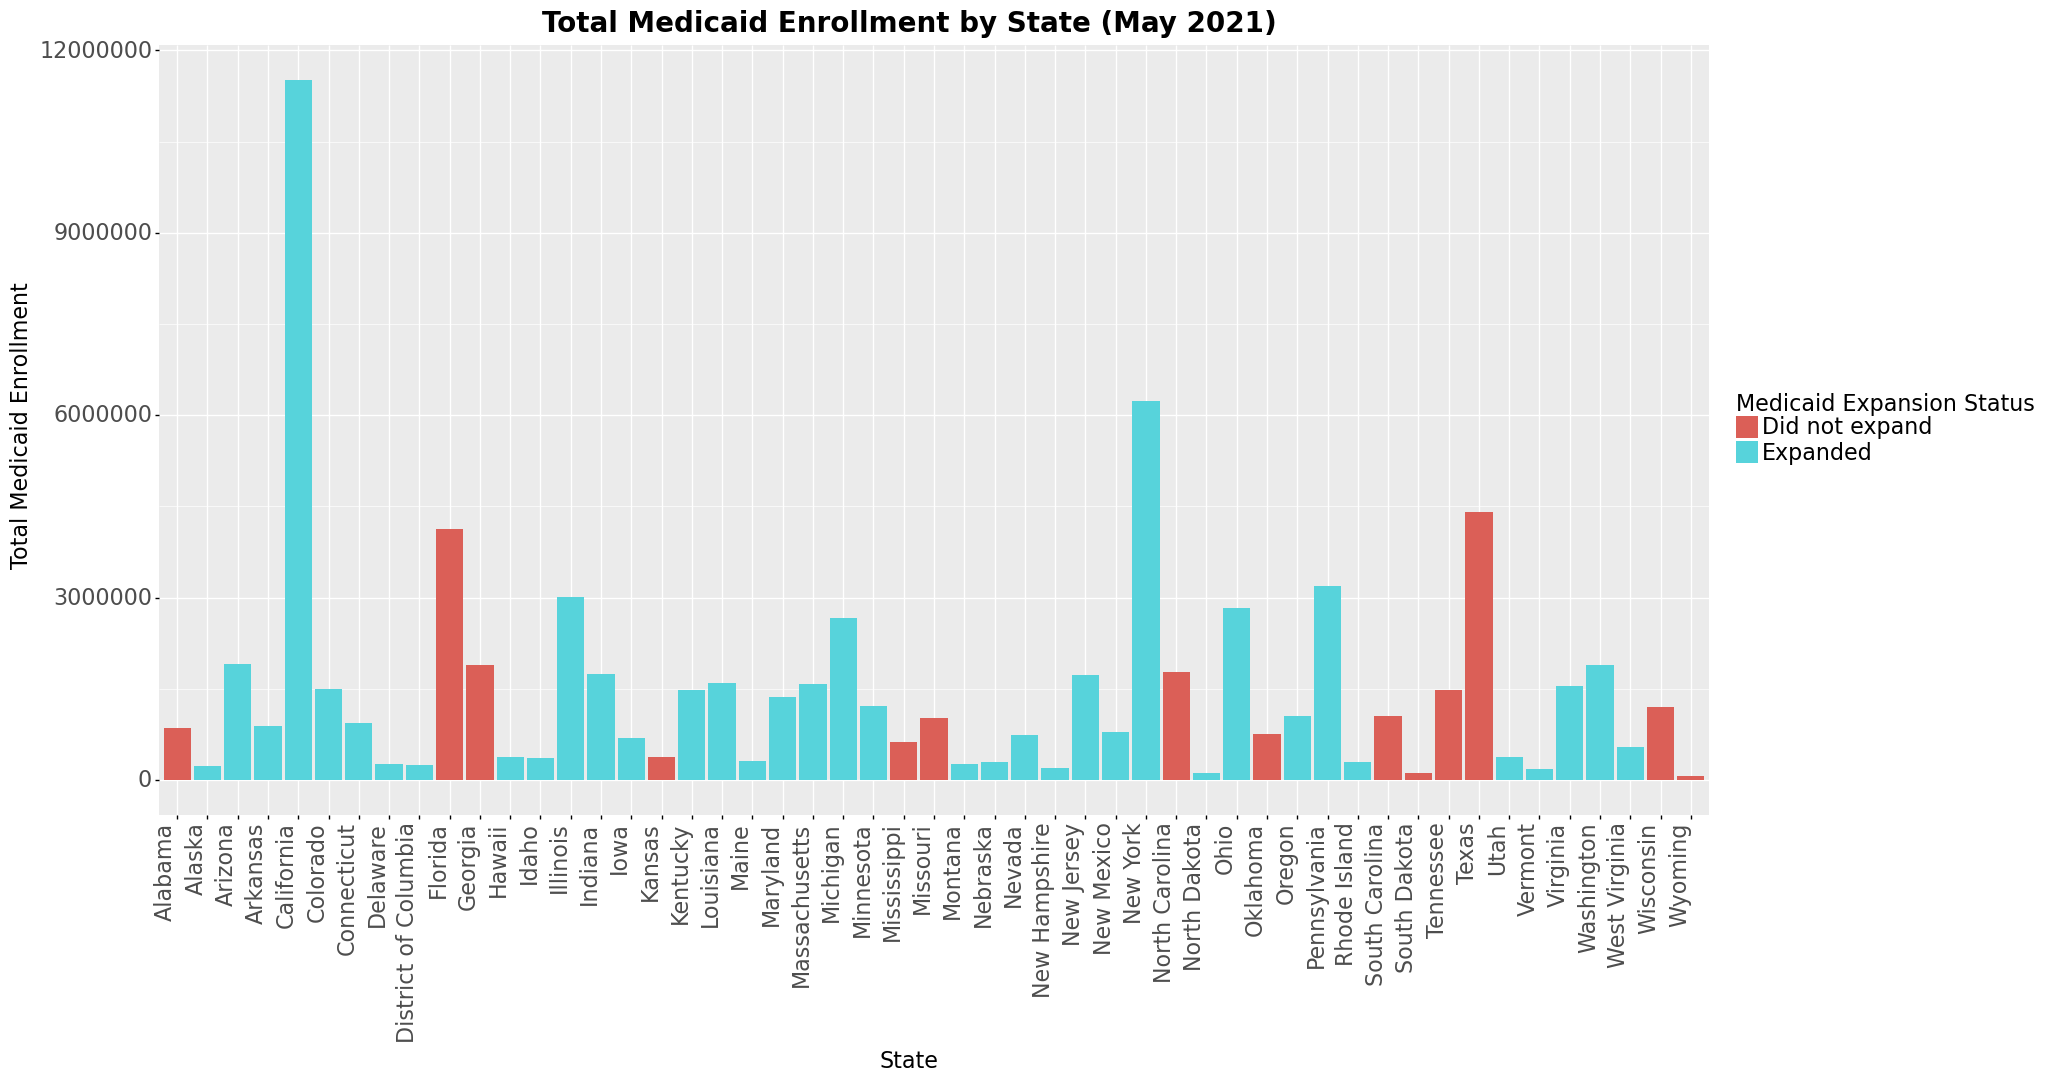

<ggplot: (8763842539243)>

In [2]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)
    
#hide_code_in_slideshow()

from plotnine import *
import pandas as pd
enroll_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/cms_enrollment_dta.csv")
enroll_dta=enroll_dta[enroll_dta['final_report'] == "Y"]
enroll_dta=enroll_dta[['state_name', "report_date", "state_expanded_medicaid", "total_medicaid_enrollment"]]
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('N','Did not expand')
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('Y','Expanded')
enroll_dta.rename(columns={"state_name":"State", "state_expanded_medicaid": "Medicaid Expansion Status", "total_medicaid_enrollment":"Total Medicaid Enrollment"}, inplace=True)  #renaming the columns
may2021=enroll_dta[enroll_dta.report_date=="2021-05-01"]
may2021=may2021.reset_index()
may2021=may2021[["State", "Total Medicaid Enrollment","Medicaid Expansion Status"]]

(ggplot(may2021,aes(x='State', y="Total Medicaid Enrollment", fill="Medicaid Expansion Status")) +
  geom_col() + 
theme(figure_size=(20, 10)) + 
theme(axis_text_x=element_text(rotation=90, hjust=1, size=16)) +
theme(axis_text_y=element_text(size=16)) +
theme(axis_title=element_text(size=16)) +
theme(legend_text=element_text(size=16), legend_title=element_text(size=16)) +
ggtitle("Total Medicaid Enrollment by State (May 2021)")+
theme(plot_title = element_text(size = 20, face = "bold")))

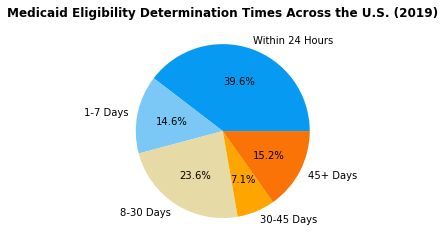

In [7]:
#hide_code_in_slideshow()

import pandas as pd
import matplotlib.pyplot as plt

elig_det_dta_19=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_dta2019.csv")
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_19=nat_total_19.groupby("State")
nat_mean_19=nat_total_19.mean()
nat_mean_19=nat_mean_19.reset_index()
nat_mean_19[['Percent of Determinations Processed\n< 24 hours', "Percent of Determinations Processed\n1 - 7 Days", "Percent of Determinations Processed\n8 - 30 Days", "Percent of Determinations Processed\n31- 45 Days", "Percent of Determinations Processed\n45+ Days"]]*100

nat_mean_19.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
nat_mean_19['Percent of Determinations Processed within 24 Hours']=nat_mean_19['Percent of Determinations Processed within 24 Hours']*100
nat_mean_19['Percent of Determinations Processed Between 1 and 7 Days']=nat_mean_19['Percent of Determinations Processed Between 1 and 7 Days']*100
nat_mean_19['Percent of Determinations Processed Between 8 and 30 Days']=nat_mean_19['Percent of Determinations Processed Between 8 and 30 Days']*100
nat_mean_19['Percent of Determinations Processed Between 31 and 45 Days']=nat_mean_19['Percent of Determinations Processed Between 31 and 45 Days']*100
nat_mean_19['Percent of Determinations Processed After 45 Days']=nat_mean_19['Percent of Determinations Processed After 45 Days']*100



nat_mean_19.set_index('State', inplace=True)
nat_mean_19_t=nat_mean_19.transpose()
nat_mean_19_t

colors=["#069AF3", "#7BC8F6", "#E6DAA6", "#FFA500", "#F97306"]

plt.pie(nat_mean_19_t['National Total'], labels=['Within 24 Hours', "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], colors=colors, autopct='%1.1f%%')
plt.title("Medicaid Eligibility Determination Times Across the U.S. (2019)", fontweight="bold")
plt.show()

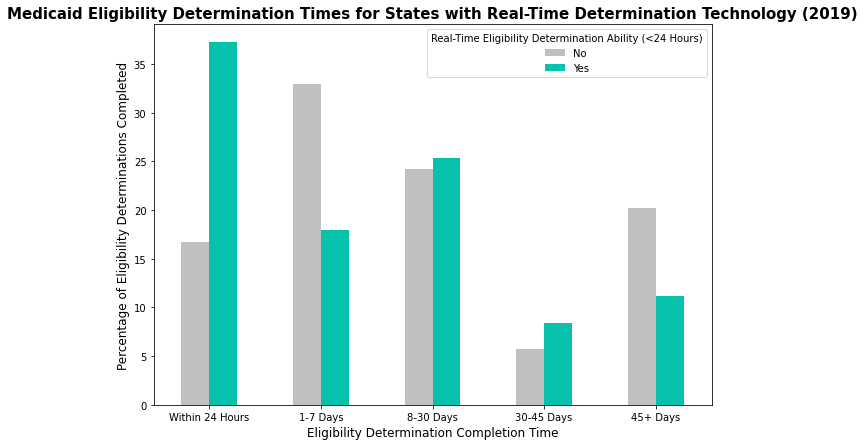

In [17]:
#hide_code_in_slideshow()

elig_det_dta_19=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_dta2019.csv")
grouped_19 = elig_det_dta_19.groupby("State")
means_19 = grouped_19.mean()

means_19 = means_19.reset_index()
means_19.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
means_19_exp=means_19.merge(may2021, how="outer", on="State")

elig_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/rted_dta_kff.csv")
elig_dta=elig_dta[['Location', "State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)"]]
elig_dta=elig_dta.drop([0])
elig_dta=elig_dta.replace({"Not reported": np.nan})
elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('Yes','1')
elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('No','0')

elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = pd.to_numeric(elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'], downcast="float")
elig_dta.rename(columns={"Location":"State", "State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)":"Real-Time Eligibility Determination Ability (<24 Hours)"}, inplace=True)  #renaming the columns

means_19_rted=means_19.merge(elig_dta, how="outer", on="State")
means_19_rted["Real-Time Eligibility Determination Ability (<24 Hours)"] = np.where(means_19_rted["Real-Time Eligibility Determination Ability (<24 Hours)"]== 1, "Yes", "No")
grouped_19_rted = means_19_rted.groupby("Real-Time Eligibility Determination Ability (<24 Hours)")

grouped_19_rted = grouped_19_rted.mean()

grouped_19_rted

grouped_19_rted=grouped_19_rted*100
grouped_19_rted=grouped_19_rted.transpose()
grouped_19_rted

grouped_19_rted.plot(kind="bar", stacked=False, figsize=(10,7), color=['#C0C0C0', "#06C2AC"])  #creating a stacked bar chart based on queried data
plt.title("Medicaid Eligibility Determination Times for States with Real-Time Determination Technology (2019)", fontsize=15, fontweight="bold")  #adding a plot title
plt.ylabel("Percentage of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(grouped_19_partisan))
plt.yticks(fontsize=10)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)

plt.show()

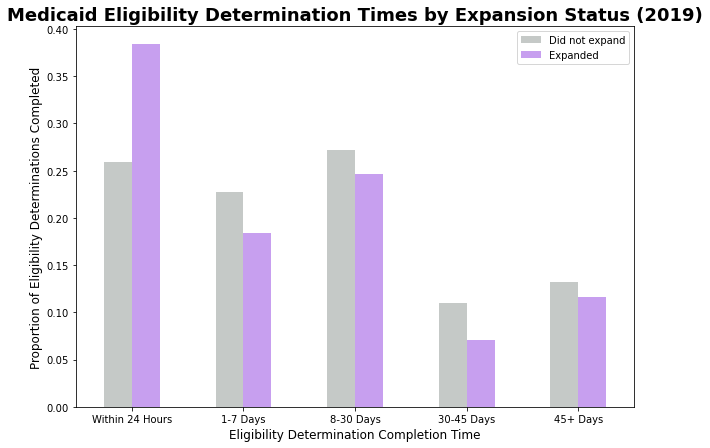

In [14]:
#hide_code_in_slideshow()

import numpy as np

grouped_19_exp = means_19_exp.groupby("Medicaid Expansion Status")
grouped_19_exp = grouped_19_exp.mean()
grouped_19_exp = grouped_19_exp.drop(columns="Total Medicaid Enrollment")
grouped_19_exp=grouped_19_exp.transpose()

grouped_19_exp.plot(kind="bar", stacked=False, figsize=(10,7), color=['#C5C9C7', "#C79FEF"])  #creating a stacked bar chart based on queried data
plt.title("Medicaid Eligibility Determination Times by Expansion Status (2019)", fontsize=18, fontweight="bold")  #adding a plot title
plt.ylabel("Proportion of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(grouped_19_exp))
plt.yticks(fontsize=10)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
plt.legend(fontsize=10)

plt.show()

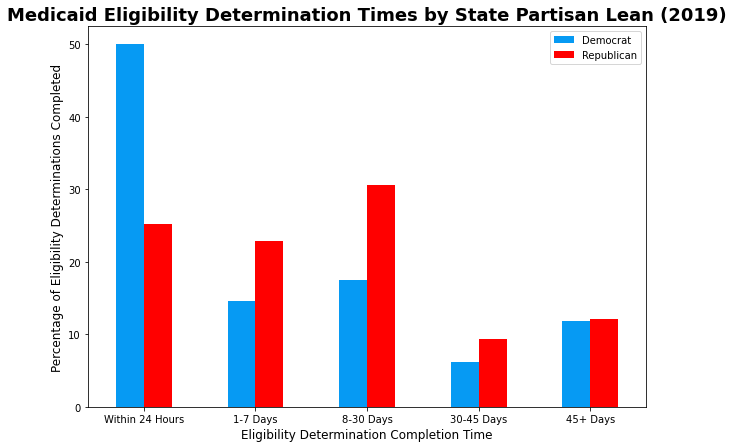

In [12]:
#hide_code_in_slideshow()

pol_lean=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/pol_lean.csv")
means_19_partisan=means_19.merge(pol_lean, how="outer", on="State")
#means_19_partisan

grouped_19_partisan = means_19_partisan.groupby("Party of Partisan Lean")
grouped_19_partisan = grouped_19_partisan.mean()
grouped_19_partisan = grouped_19_partisan.drop(columns=["Unnamed: 0", "Partisan Lean"])
grouped_19_partisan=grouped_19_partisan*100
grouped_19_partisan

grouped_19_partisan=grouped_19_partisan.transpose()
grouped_19_partisan

grouped_19_partisan.plot(kind="bar", stacked=False, figsize=(10,7), color=['#069AF3', "#FF0000"])  #creating a stacked bar chart based on queried data
plt.title("Medicaid Eligibility Determination Times by State Partisan Lean (2019)", fontsize=18, fontweight="bold")  #adding a plot title
plt.ylabel("Percentage of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(grouped_19_partisan))
plt.yticks(fontsize=10)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
plt.legend(fontsize=10)
#plt.annotate("Source: Centers for Medicare and Medicaid Services", (0,0), (-80,-20), fontsize=20, 
             #xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

# Preliminary Conclusions

### 1. Most eligibility determinations completed within a week across U.S. (>50%)

### 1. Wide state variation in eligiblity determination times

### 2. States with faster eligibility determination times:
    - Utilize real-time eligibility determination technology (RTED)
    - Expanded Medicaid
    - Lean democrat
    
### 3. Not all states with RTED process all or most applications within 24 hours

# Lessons Learned

### Issues with application processing time data
    - Low sample size
    - Time series data
    - Incomplete data collection by states
 

# Plans to Mitigate Challenges

### Challenge 1: Format of application processing time data
    - Recode data to identify median processing time for each state (given month/year)
    - Use median as outcome variable

### Challenge 1: Outcome variable is collected as time series data
    - Explore if outcome varies across months/years
    - Explore if outcome variable should be changed (change to difference across months/year)
    - Utilize state and/or month/year dummy variables
    - Potentially set next year's data as test data

### Challenge 2: Incomplete data (missingness)
    - Limit sample to observations with all data components